In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.cm as cmap
import matplotlib.colors as mpl_colors
import matplotlib.pyplot as plt
import  matplotlib.ticker as ticker
import matplotlib as mpl
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [48]:
DATA_DIR = "../input/tabular-playground-series-sep-2022/"
os.listdir(DATA_DIR)

['sample_submission.csv', 'train.csv', 'test.csv']

In [49]:
def hex_to_rgb(h):
    h = h.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

cluster_colors_hex = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']
cluster_colors_rgb = [hex_to_rgb(x) for x in cluster_colors_hex]
cmap = mpl_colors.ListedColormap(cluster_colors_rgb)
colors = cmap.colors
bg_color= '#fdfcf6'

custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'Large',
    'axes.labelsize': 'Large',
    'figure.facecolor': bg_color,
    'axes.facecolor': bg_color
}

sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(cluster_colors_hex),
    rc=custom_params
)

In [58]:
train_df = pd.read_csv(DATA_DIR+'train.csv', index_col=['row_id', 'date'])
train_df.head()

,,country,store,product,num_sold
row_id,date,,,,
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [59]:
train_df.shape

(70128, 4)

In [60]:
test_df = pd.read_csv(DATA_DIR+'test.csv', index_col=['row_id','date'])
test_df.head()

,,country,store,product
row_id,date,,,
70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


In [61]:
#train_df['date'] = pd.to_datetime(train_df['date'])


In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 70128 entries, (0, '2017-01-01') to (70127, '2020-12-31')
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   70128 non-null  object
 1   store     70128 non-null  object
 2   product   70128 non-null  object
 3   num_sold  70128 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.1+ MB


In [63]:
train_df.isnull().sum().sort_values(ascending=False)

country     0
store       0
product     0
num_sold    0
dtype: int64

In [64]:
print(train_df['product'].nunique())
print(train_df['country'].nunique())

4
6


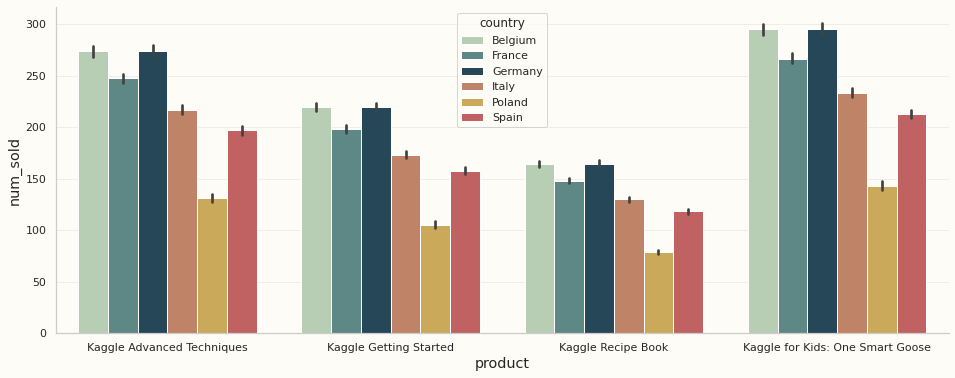

In [65]:
#ax = sns.barplot(data=train_df, x='product', y='num_sold', hue='country')

In [66]:
# ax = sns.lineplot(
#     data=train_df.groupby([
#         train_df.date.dt.strftime('%Y-%m'),
#         train_df.country
#     ])['num_sold'].sum().reset_index(),
#     x='date',
#     y='num_sold',
#     hue='country',
# )


# ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))

AttributeError: 'DataFrame' object has no attribute 'date'

In [67]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [68]:
#train_subset = train_df[['country','num_sold']]
train_df['country'] = le.fit_transform(train_df['country'])
train_df['product'] = le.fit_transform(train_df['product'])
train_df['store'] = le.fit_transform(train_df['store'])
train_df.head()

,,country,store,product,num_sold
row_id,date,,,,
0,2017-01-01,0,0,0,663
1,2017-01-01,0,0,1,615
2,2017-01-01,0,0,2,480
3,2017-01-01,0,0,3,710
4,2017-01-01,0,1,0,240


In [69]:
test_df['country'] = le.fit_transform(test_df['country'])
test_df['product'] = le.fit_transform(test_df['product'])
test_df['store'] = le.fit_transform(test_df['store'])
test_df.head()

,,country,store,product
row_id,date,,,
70128,2021-01-01,0,0,0
70129,2021-01-01,0,0,1
70130,2021-01-01,0,0,2
70131,2021-01-01,0,0,3
70132,2021-01-01,0,1,0


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = train_df.drop(['num_sold'], axis=1)
y = train_df['num_sold']



In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)


In [72]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.6172495741153385

In [75]:
preds = reg.predict(test_df)

In [77]:
submission_df = pd.read_csv(DATA_DIR+'sample_submission.csv')
submission_df['num_sold'] = preds                            

In [80]:
submission_df.to_csv('submission.csv', header=True, index=False)